## student_exam_analyzer

##### This project analyzes student exam performance based on **math, reading, and writing scores**. We calculate average scores, explore gender-wise performance, and visualize insights using colorful plots and statistical summaries.


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

#### Loading the dataset

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
print(df.head())
print(df.info())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

In [3]:
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print(df.describe())


Dataset Shape: (1000, 8)
Columns: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


#### average scores

In [4]:
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
print(df[["math score", "reading score", "writing score", "average_score"]].head())


   math score  reading score  writing score  average_score
0          72             72             74      72.666667
1          69             90             88      82.333333
2          90             95             93      92.666667
3          47             57             44      49.333333
4          76             78             75      76.333333


#### performance based on gender category

        math score  reading score  writing score  average_score
gender                                                         
female   63.633205      72.608108      72.467181      69.569498
male     68.728216      65.473029      63.311203      65.837483


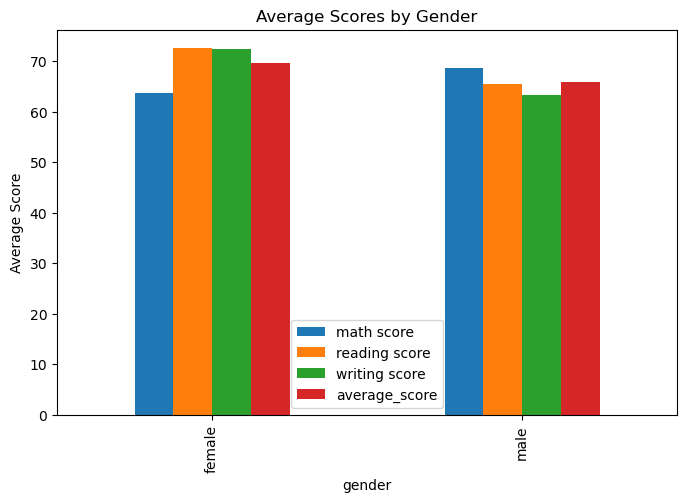

In [5]:
gender_avg = df.groupby("gender")[["math score","reading score","writing score","average_score"]].mean()
print(gender_avg)

gender_avg.plot(kind="bar", figsize=(8,5))
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.show()


#### parental education

In [7]:
import warnings
warnings.filterwarnings("ignore")

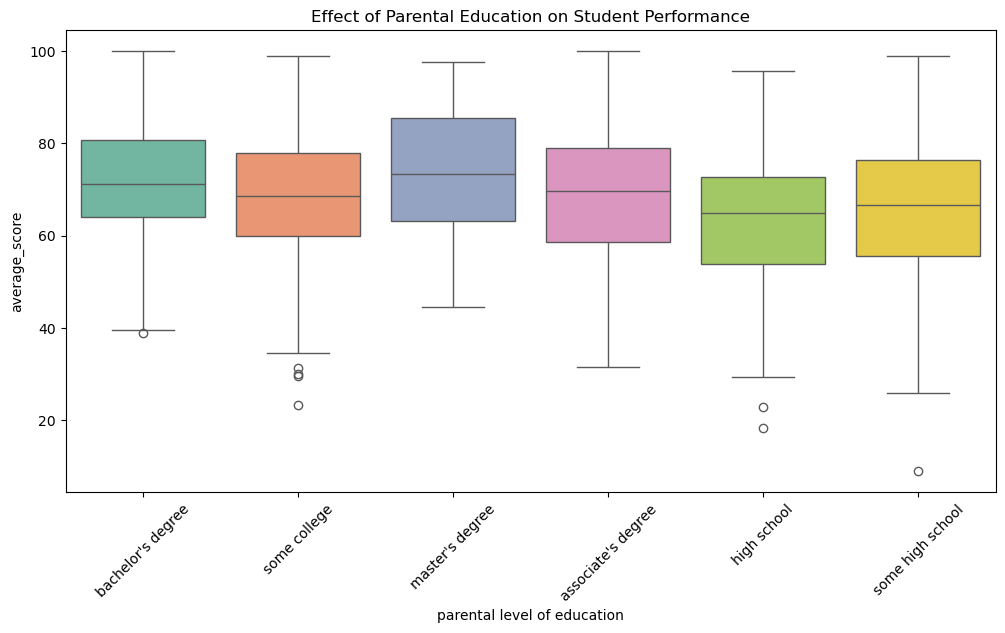

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(x="parental level of education", y="average_score", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Effect of Parental Education on Student Performance")
plt.show()


#### test preparation

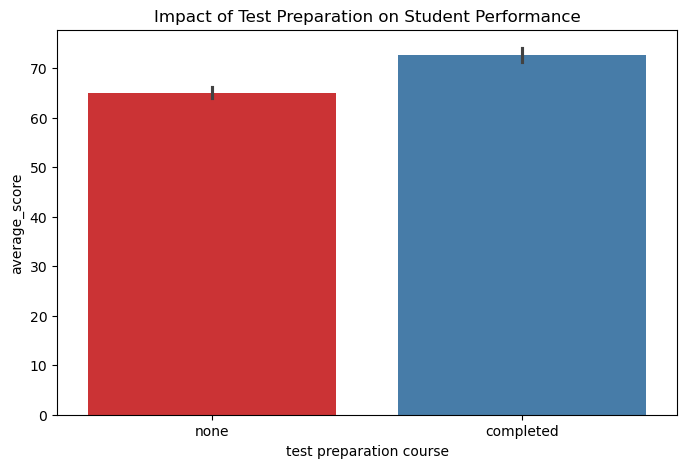

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x="test preparation course", y="average_score", data=df, palette="Set1")
plt.title("Impact of Test Preparation on Student Performance")
plt.show()


#### correlation between subjects

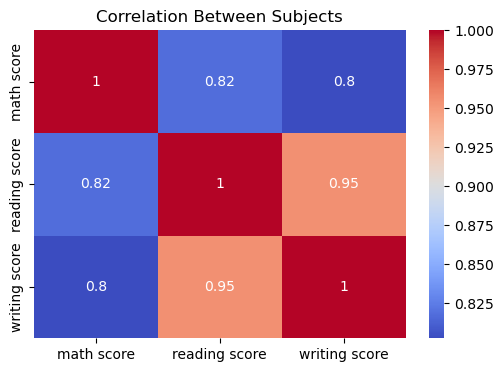

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Subjects")
plt.show()
